# Compare
- generates just the comparison graph between all algorithms

In [62]:
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [63]:
# # jupyter
# tk = th.Thicket.from_caliperreader(glob("/home/stevenm27/435Project/caliper/cpu_mpi/naive/*.cali", recursive=True))

# local
parallels = ['cpu_mpi/naive', 'cpu_mpi/SUMMA', 'cuda/naive', 'cuda/strassen']
dfs = {}

# GLOBAL VARS
process_cols = (1, 2, 4, 8, 16, 32, 64, 128) # MPI NAIVE
# process_cols = (1, 4, 16, 64) # MPI SUMMA
# process_cols = (1, 2, 4, 8, 16, 32) # CUDA NAIVE

for file_path in parallels:
    tk = th.Thicket.from_caliperreader(glob(f"../caliper/{file_path}/*.cali", recursive=True))
    
    gb = tk.groupby("num_procs" if "mpi" in file_path else "num_threads")

    ctk = th.Thicket.concat_thickets(
        thickets=list(gb.values()),
        headers=list(gb.keys()),
        axis="columns",
        metadata_key="InputSize"
    )
    
    dfs[file_path] = ctk.dataframe

dfs['cpu_mpi/naive']


8  thickets created...
{1: <thicket.thicket.Thicket object at 0x000002C9F0447590>, 2: <thicket.thicket.Thicket object at 0x000002C9F6405E50>, 4: <thicket.thicket.Thicket object at 0x000002C9F93C4F50>, 8: <thicket.thicket.Thicket object at 0x000002C9F93ED310>, 16: <thicket.thicket.Thicket object at 0x000002C9F63CC990>, 32: <thicket.thicket.Thicket object at 0x000002C9F93B9C50>, 64: <thicket.thicket.Thicket object at 0x000002C9F9363950>, 128: <thicket.thicket.Thicket object at 0x000002C9F9343B50>}
4  thickets created...
{1: <thicket.thicket.Thicket object at 0x000002C9F9342E50>, 4: <thicket.thicket.Thicket object at 0x000002C9F60D2DD0>, 16: <thicket.thicket.Thicket object at 0x000002C9F93076D0>, 64: <thicket.thicket.Thicket object at 0x000002C9F6C4A0D0>}
6  thickets created...
{1: <thicket.thicket.Thicket object at 0x000002C9F63EBF10>, 2: <thicket.thicket.Thicket object at 0x000002C9F64229D0>, 4: <thicket.thicket.Thicket object at 0x000002C9F63A9290>, 8: <thicket.thicket.Thicket object a

1                 \
                                                      nid   spot.channel   
node                                        InputSize                      
{'name': 'main', 'type': 'function'}        128         1  regionprofile   
                                            256         1  regionprofile   
                                            512         1  regionprofile   
                                            1024        1  regionprofile   
                                            2048        1  regionprofile   
                                            4096        1  regionprofile   
{'name': 'comm', 'type': 'function'}        128         3  regionprofile   
                                            256         3  regionprofile   
                                            512         3  regionprofile   
                                            1024        3  regionprofile   
                                            2048        3  regionprofile   
                                            4096        3  regionprofile   
{'name': 'barrier', 'type': 'function'}     128         7  regionprofile   
                                            256         7  regionprofile   
                                            512         7  regionprofile   
                                            1024        7  regionprofile   
                                            2048        7  regionprofile   
                                            4096        7  regionprofile   
{'name': 'comm_large', 'type': 'function'}  128         4  regionprofile   
                                            256         4  regionprofile   
                                            512         4  regionprofile   
                                            1024        4  regionprofile   
                                            2048        4  regionprofile   
                                            4096        4  regionprofile   
{'name': 'bcast', 'type': 'function'}       128         6  regionprofile   
                                            256         6  regionprofile   
                                            512         6  regionprofile   
                                            1024        6  regionprofile   
                                            2048        6  regionprofile   
                                            4096        6  regionprofile   
{'name': 'gather', 'type': 'function'}      128        10  regionprofile   
                                            256        10  regionprofile   
                                            512        10  regionprofile   
                                            1024       10  regionprofile   
                                            2048       10  regionprofile   
                                            4096       10  regionprofile   
{'name': 'scatter', 'type': 'function'}     128         5  regionprofile   
                                            256         5  regionprofile   
                                            512         5  regionprofile   
                                            1024        5  regionprofile   
                                            2048        5  regionprofile   
                                            4096        5  regionprofile   
{'name': 'comp', 'type': 'function'}        128         8  regionprofile   
                                            256         8  regionprofile   
                                            512         8  regionprofile   
                                            1024        8  regionprofile   
                                            2048        8  regionprofile   
                                            4096        8  regionprofile   
{'name': 'comp_large', 'type': 'function'}  128         9  regionprofile   
                                            256         9  regionprofile   
                            

In [64]:
# Drop unwanted columns
for file_path in parallels:
    array = [("node","")]
    for i in process_cols:
        for col in dfs[file_path].columns:
            if col[0] == i:
                break
        else:
            continue
        
        if 'cuda' in file_path:
            array.append((i,"nid"))
            array.append((i,"spot.channel"))
            array.append((i,"Min time/rank"))
            array.append((i,"Max time/rank"))
            array.append((i,"Total time"))
            array.append((i, 'Avg GPU time/rank'))
            array.append((i, 'Min GPU time/rank'))
            array.append((i, 'Max GPU time/rank'))
            array.append((i, 'Total GPU time'))
        else:
            array.append((i,"nid"))
            array.append((i,"spot.channel"))
            array.append((i,"Min time/rank"))
            array.append((i,"Max time/rank"))
            array.append((i,"Total time"))
            array.append((i,"Variance time/rank"))
    
    dfs[file_path] = dfs[file_path].reset_index().drop(array, axis=1).rename({("name", ""): "name", ("InputSize", ""): "InputSize"}).set_index(["name", "InputSize"])
    dfs[file_path] = dfs[file_path].loc[('comp', 4096)].droplevel(1)



In [65]:
for df in dfs.values():
    print(df.index)

Index([1, 2, 4, 8, 16, 32, 64, 128], dtype='object')
Index([1, 4, 16, 64], dtype='object')
Index([1, 2, 4, 8, 16, 32], dtype='object')
Index([1, 2, 4, 8, 16, 32], dtype='object')


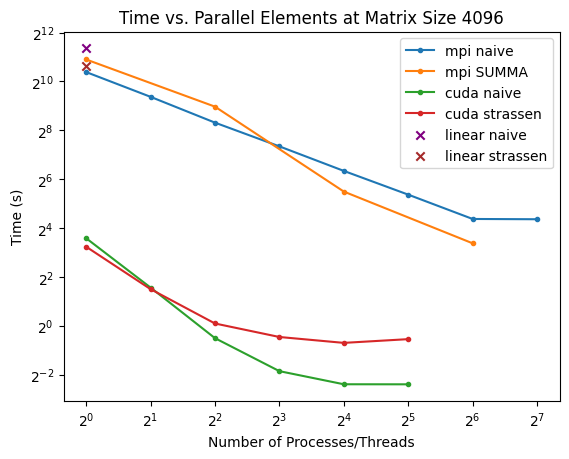

In [66]:
fig, ax = plt.subplots()
for file_path, df in dfs.items():
    ax.loglog(df, marker='.', label=file_path.replace("/", " ").replace('cpu_', ''), base=2)
ax.scatter(1, 2619.88190, marker='x', color='purple', label="linear naive")
ax.scatter(1, 1595.665294, marker='x', color='brown', label="linear strassen")
ax.set_title("Time vs. Parallel Elements at Matrix Size 4096")
ax.set_xlabel("Number of Processes/Threads")
ax.set_ylabel("Time (s)")
ax.legend()

In [67]:
# import matplotlib.pyplot as plt

# # Assuming your DataFrame is named 'df'
# df = ctk.dataframe

# # Define the matrix sizes you want to plot
# matrix_sizes = [128, 256, 512, 1024, 2048, 4096]

# # Define the communication and computation data series
# comm = ["barrier", "bcast", "gather", "scatter"]
# comp = ["comp_large", "data_init", "correctness"]

# # Loop through matrix sizes and communication data series
# for j, data_series in enumerate(comm):
#     for i, matrix_size in enumerate(matrix_sizes):
#         plt.figure(figsize=(10, 5))  # Create a new figure for each plot
#         ax = plt.gca()
#         data = df.loc[(data_series, matrix_size), :]
#         data.index = data.index.droplevel(1)  # Remove the first level of the MultiIndex
#         data.plot(ax=ax, title=f'Matrix Size: {matrix_size}, Comm: {data_series}')
#         ax.set_xlabel("num_procs")
#         ax.set_ylabel("Time (seconds)")
#         plt.show()

# # Loop through matrix sizes and computation data series
# for j, data_series in enumerate(comp):
#     for i, matrix_size in enumerate(matrix_sizes):
#         plt.figure(figsize=(10, 5))  # Create a new figure for each plot
#         ax = plt.gca()
#         data = df.loc[(data_series, matrix_size), :]
#         data.index = data.index.droplevel(1)  # Remove the first level of the MultiIndex
#         data.plot(ax=ax, title=f'Matrix Size: {matrix_size}, Comp: {data_series}')
#         ax.set_xlabel("num_procs")
#         ax.set_ylabel("Time (seconds)")
#         plt.show()

In [68]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

KeyError: 'Level name not found'

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [ ]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [ ]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [ ]:
ctk.dataframe.loc["main"]

4                                           \
          Min time/rank Max time/rank Avg time/rank   Total time   
InputSize                                                          
128            0.392027      0.398540      0.393913     1.575651   
256            0.346411      0.400129      0.360285     1.441141   
512            0.500207      0.958925      0.615386     2.461545   
1024           1.937511      7.917518      3.432799    13.731198   
2048          16.257582     80.443053     32.304383   129.217530   
4096         328.697990   1675.564007    665.414500  2661.657998   

                                         8                              \
          Variance time/rank Min time/rank Max time/rank Avg time/rank   
InputSize                                                                
128                 0.000007      0.433096      0.440360      0.434221   
256                 0.000529      0.492410      0.554987      0.503490   
512                 0.039340      0.529886      1.233589      0.620466   
1024                6.704234      1.325889      7.550431      2.105368   
2048              772.443856      8.460777     69.807645     16.129681   
4096           340134.008948    179.716693   1563.045031    352.633664   

                                                     16                \
            Total time Variance time/rank Min time/rank Max time/rank   
InputSize                                                               
128           3.473769           0.000005      6.131866      9.241619   
256           4.027923           0.000395      0.508943      0.568770   
512           4.963731           0.053707      0.520784      1.136749   
1024         16.842943           4.235534      0.951594      6.832092   
2048        129.037449         411.617690      4.591423     65.259147   
4096       2821.069309      209299.382431     94.743396   1454.893124   

                                                                   32  \
          Avg time/rank   Total time Variance time/rank Min time/rank   
InputSize                                                               
128            7.685408   122.966527           2.398687      6.152744   
256            0.518767     8.300279           0.000184      0.574143   
512            0.564259     9.028137           0.021859      0.522779   
1024           1.323841    21.181450           2.022738      0.701745   
2048           8.386800   134.188794         215.630935      2.819830   
4096         179.756225  2876.099606      108398.274082     45.091347   

                                                                       \
          Max time/rank Avg time/rank   Total time Variance time/rank   
InputSize                                                               
128            9.262938      6.933099   221.859167           1.797111   
256            0.643461      0.589362    18.859579           0.000127   
512            1.005280      0.548887    17.564379           0.006770   
1024           7.764880      0.928738    29.719625           1.507534   
2048          66.892633      5.492441   175.758118         121.681125   
4096        1445.773181     88.866504  2843.728124       59393.410687   

                     64                                           \
          Min time/rank Max time/rank Avg time/rank   Total time   
InputSize                                                          
128            6.139745      9.087473      6.514431   416.923586   
256            3.180303      3.679889      3.591665   229.866588   
512            0.460709      1.103177      0.518809    33.203748   
1024          19.128636     29.219222     22.336157  1429.514063   
2048           2.269738     62.094665      3.961659   253.546177   
4096          23.617032   1422.557660     45.483347  2910.934204   

                                       128                              \
          Variance time/rank Min time/rank Max time/rank Avg time/rank   
InputSi

In [ ]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

NameError: name 'function_names' is not defined

In [ ]:
for name in function_names:
    plot_mpl(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="num_procs",
        ylabel="Time (seconds)",
    )

## Speedup

In [ ]:
speedup_df = ctk.dataframe.loc[(slice(None),1), :].reset_index().drop("threads", axis=1).set_index("name")/ctk.dataframe

for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"{name}: thread-1/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
        loglog=False
    )